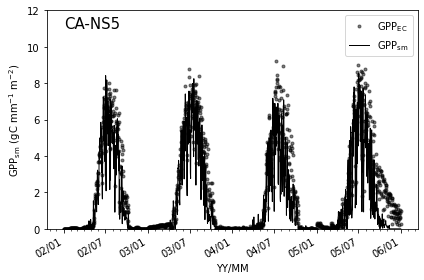

In [3]:
import numpy as np
import os
import GPPcal
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
os.chdir('H:\MOD17\MOD17 Production Efficiency Model') 
df = pd.read_excel('CA-NS5.xls')
Tmin = df.Tmin.tolist()
VPD = df.VPD.tolist()
SD = df.SD.tolist()
FPAR = df.Fpar.tolist()
GPPobs=df.GPPobs.tolist()
GPPsite=[]
a= GPPcal.initialize() 
for i in range(0,len(Tmin)):
 GPP=a.GPPcal(Tmin[i],VPD[i],SD[i],FPAR[i],1)
 GPPsite.append(GPP) 
a.terminate()
fig, host = plt.subplots()  #创建子图
host.grid(False)
#
host.xaxis.set_major_formatter(mdates.DateFormatter("%y/%m"))
host.xaxis.set_minor_locator(mdates.MonthLocator())
host.tick_params(axis = "both", direction = "out", labelsize = 10)
date1 = datetime.date(2002, 1, 1)
date2 = datetime.date(2006, 1, 1)
delta = datetime.timedelta(days =1)
dates = mdates.drange(date1, date2, delta)
A,=host.plot_date(dates,GPPobs, '.',color='black', alpha = 0.5,label='$\mathregular{GPP_{EC}}}$')
B,=host.plot_date(dates,GPPsite,'k-',linewidth =1.0, alpha = 1.0,label='$\mathregular{GPP_{sm}}}$')
fig.autofmt_xdate()
plt.text(11688.5,11,'CA-NS5',fontsize=15)
plt.ylabel('$\mathregular{GPP_{sm}}}$ (gC $\mathregular{mm^{-1}}$ $\mathregular{m^{-2}}$)')
plt.xlabel('YY/MM')
plt.ylim((0, 12));
legend=plt.legend(handles=[A, B]) 
plt.tight_layout()
plt.show()